# <h1 style='background:#4682B4; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><left>**Predict Best Seller Amazon UK Products 2023**</center></h1>

<img src = "https://i.gifer.com/7vaG.gif" width = 550 height = 300/>

<br><br>

**Auteur**

* *Louis Jordan YIYUEME TEYOU*


## **Sommaire**

1.   Import Library
2.   Getting the dataset
3.   Data Preparation
4.   Data Analysis
5.   Models
6.   Discuscion





## **I. Importation des Libraries**

In [44]:
!pip install dataprep

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# %matplotlib inline

import folium
from urllib.request import urlopen
import json

#import plotly.express as px
#from dataprep.eda  import plot

from sklearn.impute import KNNImputer

# Style
sns.set(style="darkgrid")

## **II.  Téléchargement des données**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
%cd /content/drive/My Drive/


Mounted at /content/drive
/content/drive/My Drive


In [2]:
file = "../amz_uk_processed_data.csv"
data = pd.read_csv(file)


In [3]:
data.head(5)

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


## **III. Data Preparation**

In [ ]:
# plot(data, 'title')


### Statistique descriptive


*   Dataset info
*   Count null Value
*   Dataset repartition
*   Description summary

In [ ]:
display(data.shape)
data.info()


(2222742, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB


In [ ]:
data.isnull().sum()


asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

In [ ]:
data.describe().round(2)

,stars,reviews,price,boughtInLastMonth
count,2222742.00,2222742.00,2222742.00,2222742.00
mean,2.03,382.16,94.26,18.57
std,2.19,5020.75,360.62,191.90
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,10.00,0.00
50%,0.00,0.00,19.90,0.00
75%,4.40,44.00,47.71,0.00
max,5.00,1356658.00,100000.00,50000.00


**Description :**

**`Stars`** : *les évaluations varient de **0 à 5**, ce qui est normal pour un système d'évaluation sur 5 points. Aussi, la moyenne est de **2.03** : la moyenne des évaluations est un peu basse, on peut dire que de nombreux produits ont des évaluations faibles ou casiments nuls (zéros). Ensuite, un écart-type élevé (**2.19**) indique une grande variabilité dans les évaluations. **50%** des valeurs sont **0** : La médiane étant **0**, cela signifie que plus de la moitié des produits n'ont pas d'évaluations ou sont évalués à zéro.*

**`Reviews`** : *une moyenne (**382.16**) et un écart-type élevé (**5020.75**) : moyenne relativement élevée avec un très grand écart-type suggère que quelques produits ont un nombre extrêmement élevé d'avis, tandis que la majorité en a peu ou pas. **75%** des produits ont **44** avis ou moins : la majorité des produits ont relativement peu d'avis.*

**`Price`** : *on remarque ici que les prix varient de **0 à 100 000**, ce qui suggère une large gamme de produits, certains pouvant être très chers. La moyenne de **94.26** avec un grand écart-type (**360.62**) nous indique une grande variabilité dans les prix des produits.*

**`BoughtInLastMonth`** : *les produits achetés le mois dernier ont une moyenne très faible (**18.57**) avec un écart-type très élevé (**191.90**) : ceci suggère que la plupart des produits ont été peu ou pas achetés, mais quelques-uns ont eu un nombre élevé d'achats. Une remarque : **75%** des produits n'ont pas été achetés le mois dernier : cela peut indiquer soit un grand nombre de nouveaux produits, soit une faible rotation des stocks pour la plupart des produits.*

Notre variable `isBestSeller` est de type booléen. Nous allons donc le convertir en integer.

In [4]:
data['isBestSeller'] = data['isBestSeller'].astype(int)
data['isBestSeller']


0          0
1          1
2          0
3          0
4          0
          ..
2222737    0
2222738    0
2222739    0
2222740    0
2222741    0
Name: isBestSeller, Length: 2222742, dtype: int32

Aussi, pour la varible `categoryName`, nous allons le recoder en un type de données catégoriel et ensuite créer une nouvelle colonne pour assigner une valeur unique à chaque catégorie.

In [5]:
# Conversion en type catégoriel
data["categoryName"] = data["categoryName"].astype("category")

# Obtention des valeurs par catégorie dans la nouvelle colonne
data["categoryCode"] = data["categoryName"].cat.codes
data.head(3)


,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,categoryCode
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,0,0,Hi-Fi Speakers,130
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,1,0,Hi-Fi Speakers,130
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,0,0,Hi-Fi Speakers,130


Lorqu'on reprend maintenant notre fonction `describe()`, on a donc :

In [ ]:
data.describe().round(2)

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryCode
count,2222742.00,2222742.00,2222742.00,2222742.00,2222742.00,2222742.00
mean,2.03,382.16,94.26,0.00,18.57,190.60
std,2.19,5020.75,360.62,0.05,191.90,84.48
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,10.00,0.00,0.00,117.00
50%,0.00,0.00,19.90,0.00,0.00,232.00
75%,4.40,44.00,47.71,0.00,0.00,262.00
max,5.00,1356658.00,100000.00,1.00,50000.00,295.00


Dans notre dataset, nous avons des colonnes dont on aura pas besoin pour nos analyses. Nous pouvons donc les supprimer.

In [6]:
columns_to_drop = ['asin', 'imgUrl', 'productURL',"title","categoryName"]
data = data.drop(columns = columns_to_drop)
data.head()


,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryCode
0,4.7,15308,21.99,0,0,130
1,4.7,98099,23.99,1,0,130
2,4.7,15308,21.99,0,0,130
3,4.7,7205,31.99,0,0,130
4,4.6,1881,17.99,0,0,130


### Gestion des outliers

In [ ]:
# Fonction pour détecter les outliers

def detect_outliers(df):
    """
    Détecte les outliers dans un DataFrame pandas en utilisant la méthode de l'écart interquartile (IQR).

    Paramètres:
    df (pandas.DataFrame): Le DataFrame dans lequel chercher les outliers.

    Retourne:
    list: Liste des indices uniques des lignes contenant des outliers.
    """

    # Initialisation de la liste pour stocker les indices des outliers
    outlier_indices = []

    # Parcourir chaque colonne numérique du DataFrame
    for col in df.columns:
        # Vérifier si la colonne est de type numérique
        if pd.api.types.is_numeric_dtype(df[col]):
            # Calculer le premier et le troisième quartile
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            # Calculer l'écart interquartile (IQR)
            IQR = Q3 - Q1

            # Trouver les indices des outliers pour la colonne
            # Les outliers sont les valeurs en dehors de [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
            outliers_col = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index
            # Ajouter les indices des outliers à la liste globale
            outlier_indices.extend(outliers_col)

    # Obtenir des indices uniques pour éviter les doublons
    unique_outliers = list(set(outlier_indices))

    # Retourner la liste des indices uniques des outliers
    return unique_outliers


In [ ]:
outlier_indices = detect_outliers(data)
print(len(outlier_indices))


737800


In [ ]:
# Fonction pour représenter nos outliers

def plot_boxplots(df, figsize = (20, 20)):
    """
    Affiche des boxplots pour chaque colonne quantitative d'un DataFrame pandas.

    Paramètres:
    df (pandas.DataFrame): DataFrame contenant les données.
    figsize (tuple): Taille de la figure pour les boxplots.
    """
    # Sélectionner les colonnes quantitatives
    numeric_columns = df.select_dtypes(include=['number']).columns
    n_cols = 3  # Nombre de colonnes dans la grille de sous-graphiques
    n_rows = 3  # Nombre de lignes dans la grille de sous-graphiques

    # Créer une figure et des axes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Ajuster l'espace entre les graphiques

    # Itérer sur la grille de sous-graphiques et tracer les boxplots
    for i, ax in enumerate(axes.flatten()):
        if i < len(numeric_columns):
            sns.boxplot(y=df[numeric_columns[i]], ax=ax)
            ax.set_title(f'Boxplot of {numeric_columns[i]}')
        else:
            ax.set_visible(False)  # Cacher les axes supplémentaires s'il n'y a plus de colonnes à tracer

    # Afficher la figure
    plt.show()


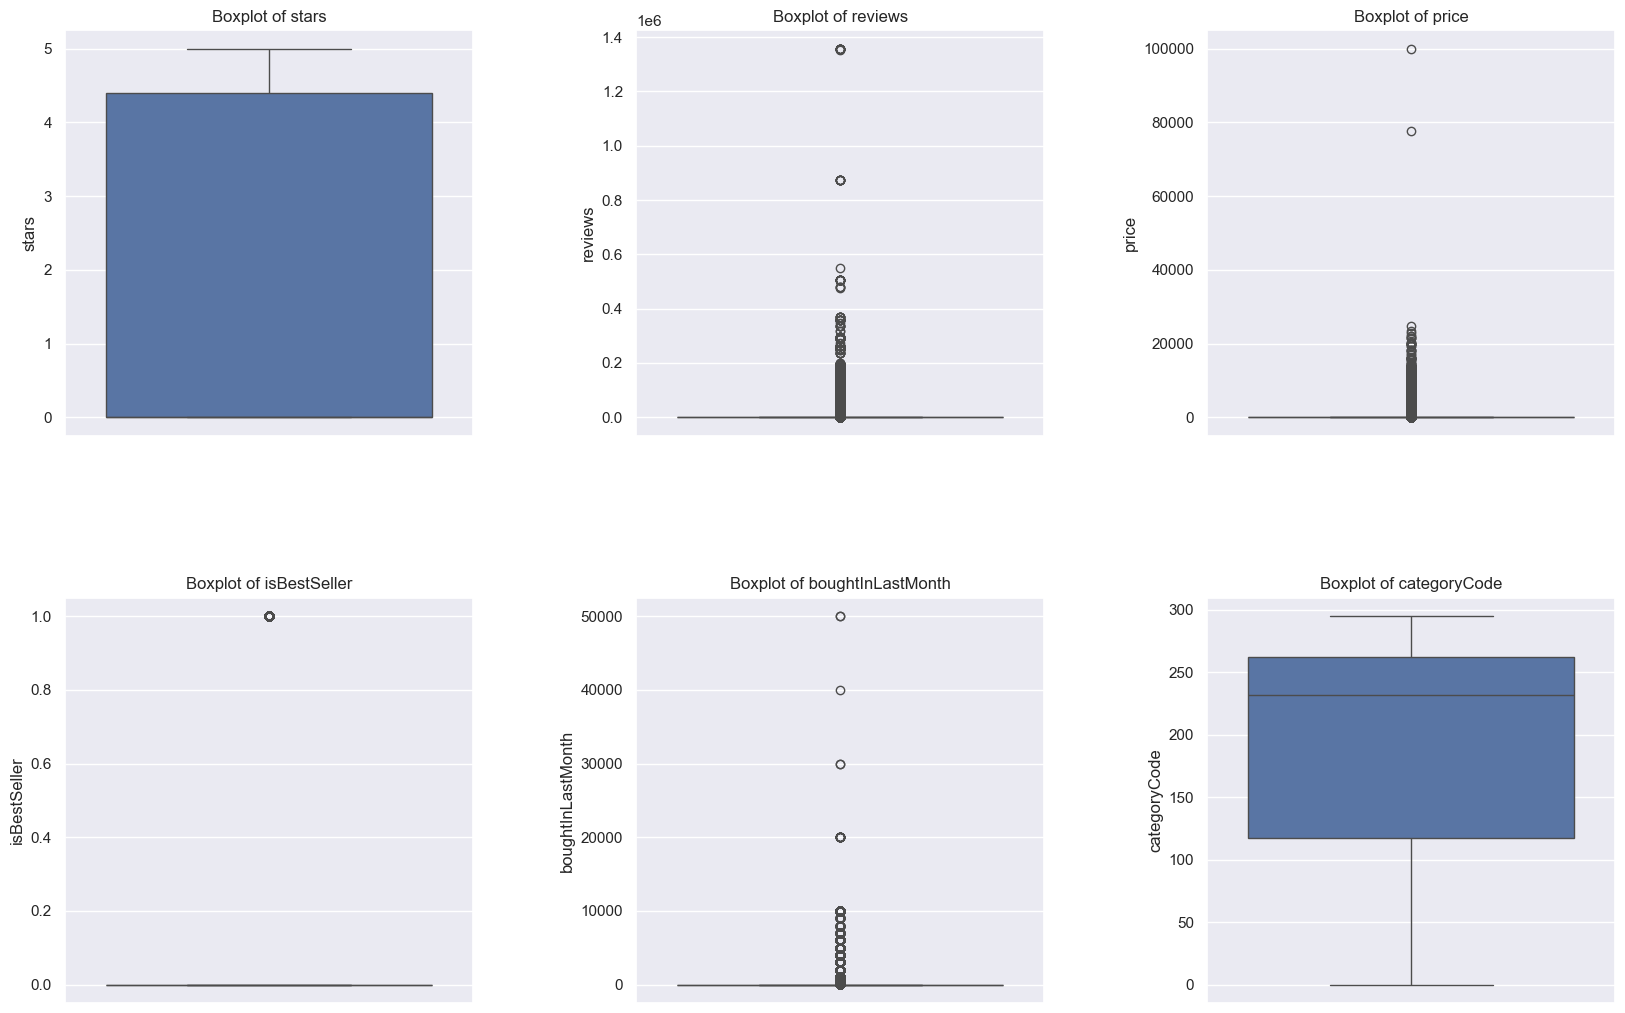

In [ ]:
plot_boxplots(data)


Essayons de voir par variable, les zéros que nous avons.

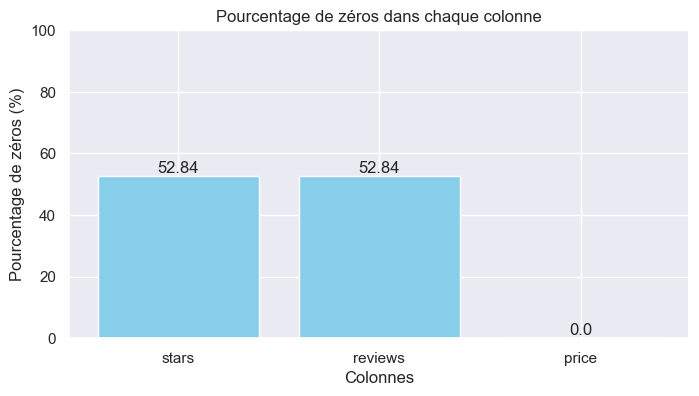

In [ ]:
cols = ['stars', 'reviews', 'price']

# Calculer le pourcentage de zéros pour chaque colonne
percent_zeros = [(data[col] == 0).sum() / len(data) * 100 for col in cols]

# Créer un histogramme
plt.figure(figsize=(8,4))
bars = plt.bar(cols, percent_zeros, color='skyblue')

# Ajouter des étiquettes aux barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de zéros (%)')
plt.title('Pourcentage de zéros dans chaque colonne')

plt.ylim(0, 100)  # Pour rendre les pourcentages plus lisibles
plt.show()


Nous pouvons concluons qu'il y a des ouliers dans notre dataset.

Mais aussi, il y'a beaucoup de valeurs nulle qui vont pertuber la distrubtion. Pour les éviter, essayons les stratégies :
*   utiliser les KNNImputer pour remplacer les zeros par la moyenne des plus proches voisins
*   remplacer les zeros par les quartiles
*   remplacer les zeros par la moyennes
*   supprimer les zeros

Les colonnes à prendre en compte sont : **`stars`**, **`reviews`** et **`price`**

### **Preprocessing**

#### **1 - KNN Imputer**

In [11]:
data_KNN = data.head(1000)
data_KNN.describe()

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryCode
count,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.0
mean,4.34650,4059.283000,149.856420,0.01200,2.950000,130.0
std,0.69934,11659.171863,203.777237,0.10894,39.055381,0.0
min,0.00000,0.000000,6.290000,0.00000,0.000000,130.0
25%,4.30000,90.750000,35.200000,0.00000,0.000000,130.0
50%,4.50000,427.500000,83.040000,0.00000,0.000000,130.0
75%,4.70000,1893.000000,179.247500,0.00000,0.000000,130.0
max,5.00000,103673.000000,2499.000000,1.00000,1000.000000,130.0


In [12]:
data_KNN=data_KNN.head(1000)
data_KNN.describe()
data_KNN['stars'] = data_KNN['stars'].replace(0, np.nan)
data_KNN['reviews'] = data_KNN['reviews'].replace(0, np.nan)
#data_KNN['price'] = data_KNN['price'].replace(0, np.nan)
data_KNN.head(3)

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryCode
0,4.7,15308.0,21.99,0,0,130
1,4.7,98099.0,23.99,1,0,130
2,4.7,15308.0,21.99,0,0,130


In [13]:
data_KNN=data_KNN.head(1000)
data_KNN.describe()


,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryCode
count,980.000000,980.000000,1000.000000,1000.00000,1000.000000,1000.0
mean,4.435204,4142.125510,149.856420,0.01200,2.950000,130.0
std,0.324416,11763.070928,203.777237,0.10894,39.055381,0.0
min,2.100000,1.000000,6.290000,0.00000,0.000000,130.0
25%,4.300000,110.750000,35.200000,0.00000,0.000000,130.0
50%,4.500000,456.000000,83.040000,0.00000,0.000000,130.0
75%,4.700000,1996.000000,179.247500,0.00000,0.000000,130.0
max,5.000000,103673.000000,2499.000000,1.00000,1000.000000,130.0


In [14]:
imputer=KNNImputer(n_neighbors = 5 ,metric = 'nan_euclidean' )
data_imputed = imputer.fit_transform(data_KNN[['stars', 'reviews']])
print(data_imputed)

[[4.7000e+00 1.5308e+04]
 [4.7000e+00 9.8099e+04]
 [4.7000e+00 1.5308e+04]
 ...
 [4.7000e+00 1.3100e+02]
 [3.7000e+00 2.6000e+01]
 [4.4000e+00 7.0000e+00]]


In [15]:
#data_imputed_df = pd.DataFrame(data_imputed, columns = ['stars', 'reviews', 'price'])

data_KNN.update(data_imputed)  # Mettre à jour les colonnes imputées dans data_KNN
data_KNN.describe()


,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryCode
count,980.000000,980.000000,1000.000000,1000.00000,1000.000000,1000.0
mean,4.435204,4142.125510,149.856420,0.01200,2.950000,130.0
std,0.324416,11763.070928,203.777237,0.10894,39.055381,0.0
min,2.100000,1.000000,6.290000,0.00000,0.000000,130.0
25%,4.300000,110.750000,35.200000,0.00000,0.000000,130.0
50%,4.500000,456.000000,83.040000,0.00000,0.000000,130.0
75%,4.700000,1996.000000,179.247500,0.00000,0.000000,130.0
max,5.000000,103673.000000,2499.000000,1.00000,1000.000000,130.0


In [17]:
data_KNN.describe()

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryCode
count,2.222742e+06,2.222742e+06,2.222742e+06,2.222742e+06,2.222742e+06,2.222742e+06
mean,2.031870e+00,3.821617e+02,9.425737e+01,2.707467e-03,1.856902e+01,1.905999e+02
std,2.185497e+00,5.020752e+03,3.606225e+02,5.196285e-02,1.919030e+02,8.448336e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.170000e+02
50%,0.000000e+00,0.000000e+00,1.990000e+01,0.000000e+00,0.000000e+00,2.320000e+02
75%,4.400000e+00,4.400000e+01,4.771000e+01,0.000000e+00,0.000000e+00,2.620000e+02
max,5.000000e+00,1.356658e+06,1.000000e+05,1.000000e+00,5.000000e+04,2.950000e+02


In [ ]:
cols = ['stars', 'reviews', 'price']

# Calculer le pourcentage de zéros pour chaque colonne
percent_zeros = [(data_KNN[col] == 0).sum() / len(data_KNN) * 100 for col in cols]
percent_zeros

[52.83654153293544, 52.83654153293544, 0.0008098105853040974]

#### **2 - Remplacer par les quartiles**

In [18]:
q1_stars = data["stars"].quantile(0.25)
q2_stars = data["stars"].quantile(0.5)
q3_stars = data["stars"].quantile(0.75)

print(f"Premier quartile de stars : {q1_stars}")
print(f"Deuxième quartile de stars (médiane) : {q2_stars}")
print(f"Troisième quartile de stars : {q3_stars}")


Premier quartile de stars : 0.0
Deuxième quartile de stars (médiane) : 0.0
Troisième quartile de stars : 4.4


In [19]:
q1_reviews = data["reviews"].quantile(0.25)
q2_reviews = data["reviews"].quantile(0.5)
q3_reviews = data["reviews"].quantile(0.75)

print(f"Premier quartile de stars : {q1_reviews}")
print(f"Deuxième quartile de stars (médiane) : {q2_reviews}")
print(f"Troisième quartile de stars : {q3_reviews}")


Premier quartile de stars : 0.0
Deuxième quartile de stars (médiane) : 0.0
Troisième quartile de stars : 44.0


*Pour nos deux variables, les deux premiers quartiles sont nuls. Utilisons pour remplacer le 3e quartile*

In [20]:
data_q3 = data.copy()
data_q3.head(3)


,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryCode
0,4.7,15308,21.99,0,0,130
1,4.7,98099,23.99,1,0,130
2,4.7,15308,21.99,0,0,130


In [21]:
data_q3["stars"].replace(0, q3_stars, inplace = True)
data_q3["reviews"].replace(0, q3_reviews, inplace = True)


In [ ]:
cols = ['stars', 'reviews']

# Calculer le pourcentage de zéros pour chaque colonne
percent_zeros = [(data_q3[col] == 0).sum() / len(data_q3) * 100 for col in cols]
percent_zeros


[0.0, 0.0]

In [ ]:
# data_q3['price'].unique()

In [ ]:
# mean_prices = data_q3.groupby("categoryCode")["price"].mean()
# for category_code, mean_price in mean_prices.items():
#     data_q3.loc[data_q3["categoryCode"] == category_code, "price"] = data_q3.loc[data_q3["categoryCode"] == category_code, "price"].replace(0, mean_price)

In [ ]:
# data_q3.describe().round(2)

#### **3 - Remplacer par la moyenne des catégories**

In [ ]:
data_mean = data.copy()
data_mean.head()


,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,categoryCode
0,4.7,15308,21.99,0,0,Hi-Fi Speakers,130
1,4.7,98099,23.99,1,0,Hi-Fi Speakers,130
2,4.7,15308,21.99,0,0,Hi-Fi Speakers,130
3,4.7,7205,31.99,0,0,Hi-Fi Speakers,130
4,4.6,1881,17.99,0,0,Hi-Fi Speakers,130


In [ ]:
# mean_prices = data_mean.groupby("categoryCode")["price"].mean()
mean_stars = data_mean.groupby("categoryCode")["stars"].mean()
mean_reviews = data_mean.groupby("categoryCode")["reviews"].mean()


In [ ]:
# for category_code, mean_price in mean_prices.items():
#     data_mean.loc[data_mean["categoryCode"] == category_code, "price"] = data_mean.loc[data_mean["categoryCode"] == category_code, "price"].replace(0, mean_price)

for category_code, mean_stars in mean_stars.items():
    data_mean.loc[data_mean["categoryCode"] == category_code, "stars"] = data_mean.loc[data_mean["categoryCode"] == category_code, "stars"].replace(0, mean_stars)

for category_code, mean_reviews in mean_reviews.items():
    data_mean.loc[data_mean["categoryCode"] == category_code, "reviews"] = data_mean.loc[data_mean["categoryCode"] == category_code, "reviews"].replace(0, mean_reviews)

In [ ]:
cols = ['stars', 'reviews']

# Calculer le pourcentage de zéros pour chaque colonne
percent_zeros = [(data_mean[col] == 0).sum() / len(data_mean) * 100 for col in cols]
percent_zeros

[0.0, 0.0]

## **IV. Exploration des données**

In [ ]:
data_explo = data.copy()
data_explo

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,categoryCode
0,4.7,15308,21.99,0,0,Hi-Fi Speakers,130
1,4.7,98099,23.99,1,0,Hi-Fi Speakers,130
2,4.7,15308,21.99,0,0,Hi-Fi Speakers,130
3,4.7,7205,31.99,0,0,Hi-Fi Speakers,130
4,4.6,1881,17.99,0,0,Hi-Fi Speakers,130
...,...,...,...,...,...,...,...
2222737,0.0,0,22.34,0,0,Motorbike Clothing,196
2222738,0.0,0,97.99,0,0,Motorbike Clothing,196
2222739,0.0,0,52.99,0,0,Motorbike Clothing,196
2222740,4.3,404,79.99,0,0,Motorbike Clothing,196


### **Best Seller**
*Comment sont les best-sellers dans notre base de données*

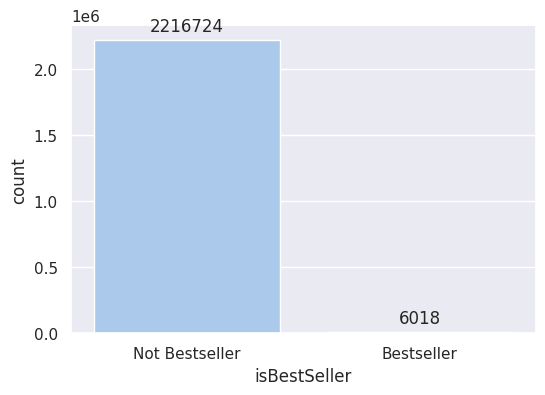

In [ ]:
# Encodage de la colonne
custom_labels = {0: "Not Bestseller", 1: "Bestseller"}
data_explo['isBestSeller'] = data_explo['isBestSeller'].map(custom_labels)

plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'isBestSeller', data = data_explo, palette='pastel')

# Ajouter des étiquettes au-dessus des barres
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()


*Quelle est la part de ces best-sellers dans les achats du dernier mois ?*

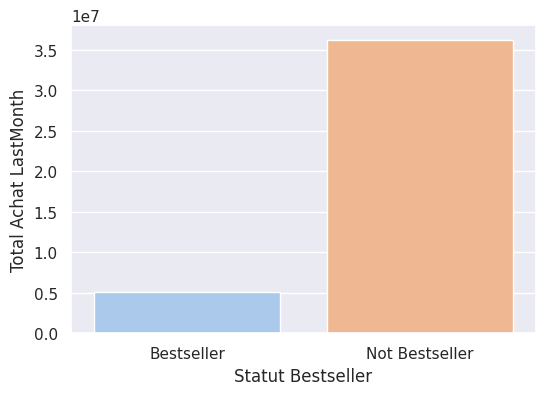

In [ ]:
sum_lastmonth = data_explo.groupby('isBestSeller')['boughtInLastMonth'].sum()
sum_lastmonth_df = sum_lastmonth.reset_index()  # conversion en DataFrame pour faciliter le tracé

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='isBestSeller', y='boughtInLastMonth', data = sum_lastmonth_df, palette = 'pastel')

# Ajouter des étiquettes pour plus de clarté
ax.set_xlabel('Statut Bestseller')
ax.set_ylabel('Total Achat LastMonth')

plt.show()


### **Performence de vente**
Ici, nous allons regrouper les données par la catégorie du produit et calculer la performance des ventes.

In [ ]:
# regrouper les données par nom de catégorie de produit en fonction des ventes le mois dernier
category_sales = data_explo.groupby('categoryName')['boughtInLastMonth'].sum().reset_index()
category_sales = category_sales.sort_values(by = 'boughtInLastMonth', ascending=False)
category_sales

,categoryName,boughtInLastMonth
126,Health & Personal Care,8282750
109,Grocery,4320950
221,Pet Supplies,3231200
251,Skin Care,2095500
266,Storage & Organisation,1796900
...,...,...
138,Home Entertainment,0
133,Hockey Shoes,0
121,Handmade Kitchen & Dining,0
108,Graphics Cards,0


In [ ]:
# Selection du top 10
top_10_category_sales = category_sales.nlargest(10, 'boughtInLastMonth')
top_10_category_sales

,categoryName,boughtInLastMonth
126,Health & Personal Care,8282750
109,Grocery,4320950
221,Pet Supplies,3231200
251,Skin Care,2095500
266,Storage & Organisation,1796900
8,Arts & Crafts,1048900
176,Make-up,1009700
210,Office Supplies,968900
209,Office Paper Products,862450
9,Baby,771000


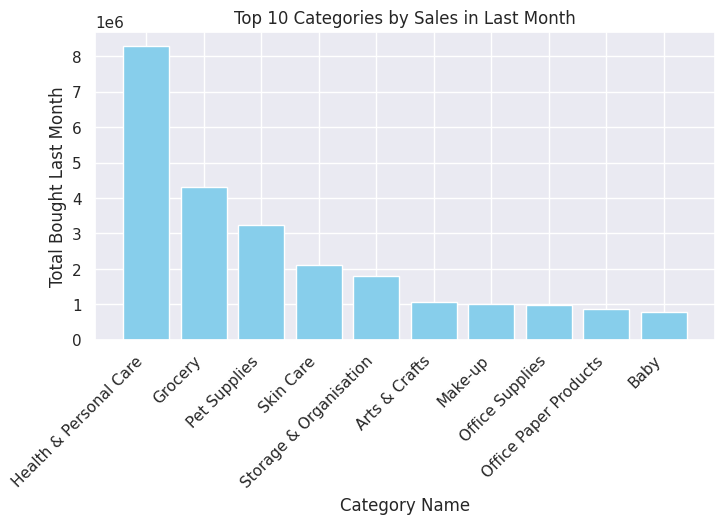

In [ ]:
top_10_category_sales = pd.DataFrame(top_10_category_sales)

# Tracer le diagramme à barres
plt.figure(figsize=(8,4))

plt.bar(top_10_category_sales['categoryName'], top_10_category_sales['boughtInLastMonth'], color='skyblue')

# Ajouter des étiquettes et un titre
plt.xlabel('Category Name')
plt.ylabel('Total Bought Last Month')
plt.title('Top 10 Categories by Sales in Last Month')

plt.xticks(rotation=45, ha='right')  # Faire pivoter les étiquettes pour une meilleure lisibilité

plt.show()


**Nous allons maintenant voir le volume de vente**

In [ ]:
# Le volume de vente pour chaque produit
data_explo['MoneyVolume'] = data_explo['price'] * data_explo['boughtInLastMonth']
category_money_volume = data_explo.groupby('categoryName')['MoneyVolume'].sum().reset_index()
top_10_categories_by_money_volume = category_money_volume.nlargest(10, 'MoneyVolume')
top_10_categories_by_money_volume

,categoryName,MoneyVolume
126,Health & Personal Care,99071975.0
221,Pet Supplies,47098959.5
109,Grocery,46753181.0
266,Storage & Organisation,26772409.5
251,Skin Care,22154166.5
253,Small Kitchen Appliances,19603067.5
216,PC & Video Games,18246822.5
9,Baby,15141262.5
287,Vacuums & Floorcare,14483859.5
262,Sports & Outdoors,13191896.5


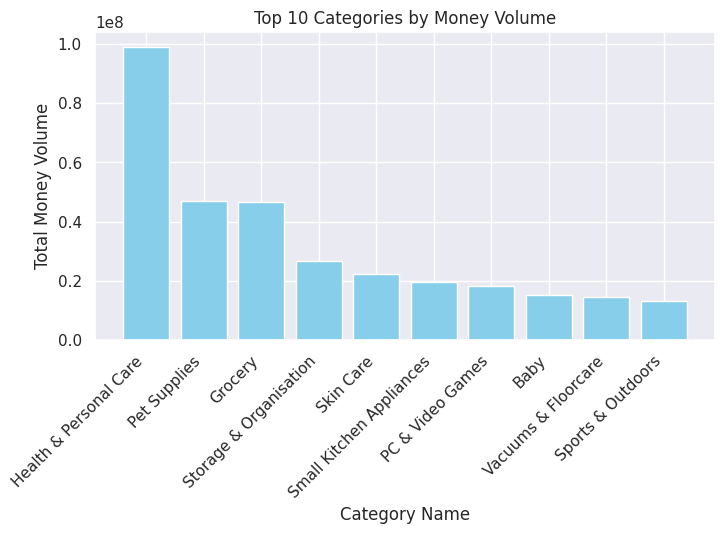

In [ ]:
top_10_categories_by_money_volume = pd.DataFrame(top_10_categories_by_money_volume)

# Tracer le diagramme à barres
plt.figure(figsize=(8,4))

plt.bar(top_10_categories_by_money_volume['categoryName'], top_10_categories_by_money_volume['MoneyVolume'], color='skyblue')

# Ajouter des étiquettes et un titre
plt.xlabel('Category Name')
plt.ylabel('Total Money Volume')
plt.title('Top 10 Categories by Money Volume')

plt.xticks(rotation=45, ha='right')  # Faire pivoter les étiquettes pour une meilleure lisibilité

plt.show()

**Essayons de voir le montant total des ventes : le chiffre d'affaire de Amazon UK**

In [ ]:
CA = data_explo['MoneyVolume'].sum()
format_euro = f"£{CA:,.2f}"
print(f"Total CA Amazon UK de notre dataset: \033[1m{format_euro}\033[0m")


Total CA Amazon UK de notre dataset: £600,089,707.00


### **Evaluation des produits**

**Moyenne des avis sur les produits**

In [ ]:
avg_reviews = data_explo['reviews'].mean()
print(f'Average number of reviews: \033[1m{avg_reviews:.2f}\033[0m')

Average number of reviews: 382.16


**Nous supposons qu'un produit est bien évalué lorsqu'il a plus de 10000 évaluations**

In [ ]:
# Filtre des catégories de produits dans le top 10 les plus vendus
filtered_df = data_explo[data_explo['reviews'] >= 10000]
filtered_df = filtered_df[filtered_df['categoryName'].isin(top_10_category_sales['categoryName'])]

# Les plus évalués
top_rated_products = filtered_df.groupby('categoryName').apply(lambda x: x[x['stars'] == x['stars'].max()])
top_rated_products.head()


stars  reviews  price  isBestSeller  boughtInLastMonth  \
categoryName                                                                    
Arts & Crafts 2017227    4.8    12956   6.69             0                200   
              2020045    4.8    10074   9.64             0                 50   
Baby          1115335    4.8    12773  23.80             0                  0   
              1115405    4.8    39923  20.30             0                  0   
              1116346    4.8    15560  22.10             0                  0   

                        categoryName  categoryCode  MoneyVolume  
categoryName                                                     
Arts & Crafts 2017227  Arts & Crafts             8       1338.0  
              2020045  Arts & Crafts             8        482.0  
Baby          1115335           Baby             9          0.0  
              1115405           Baby             9          0.0  
              1116346           Baby             9          0.0

In [ ]:
# Supprime l'index
top_rated_products = top_rated_products.reset_index(drop = True)

# Sélection le premier élément de chaque groupe de produits
sorted_top_rated_products = top_rated_products.sort_values(by ='stars', ascending = False).groupby('categoryName').head(1)
sorted_top_rated_products

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,categoryCode,MoneyVolume
49,4.9,10823,3.99,0,6000,Health & Personal Care,126,23940.0
0,4.8,12956,6.69,0,200,Arts & Crafts,8,1338.0
51,4.8,47253,13.99,1,800,Office Paper Products,209,11192.0
58,4.8,12120,9.40,0,0,Office Supplies,210,0.0
50,4.8,36070,12.87,0,0,Make-up,176,0.0
48,4.8,11033,31.99,0,200,Grocery,109,6398.0
59,4.8,19897,6.50,1,10000,Pet Supplies,221,65000.0
71,4.8,91408,17.86,0,50,Skin Care,251,893.0
78,4.8,29544,8.79,0,100,Storage & Organisation,266,879.0
10,4.8,20304,23.10,0,0,Baby,9,0.0


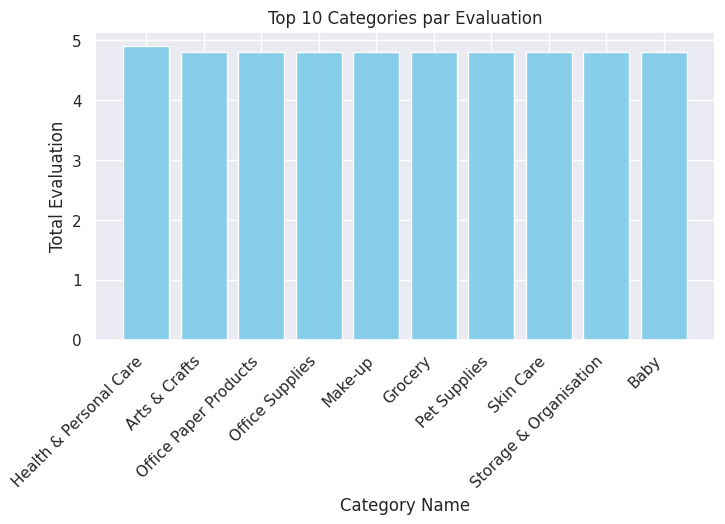

In [ ]:
sorted_top_rated_products = pd.DataFrame(sorted_top_rated_products)

# Tracer le diagramme à barres
plt.figure(figsize=(8,4))

plt.bar(sorted_top_rated_products['categoryName'], sorted_top_rated_products['stars'], color='skyblue')

# Ajouter des étiquettes et un titre
plt.xlabel('Category Name')
plt.ylabel('Total Evaluation')
plt.title('Top 10 Categories par Evaluation')

plt.xticks(rotation=45, ha='right')  # Faire pivoter les étiquettes pour une meilleure lisibilité

plt.show()

Pour tous les produits, quel

### **Catégories de produits**

**Nous allons identifier le Top 10 des produits les plus vendus le mois dernier**

In [ ]:
top_10_products_bought_in_last_month = data_explo.nlargest(10, 'boughtInLastMonth')
top_10_products_bought_in_last_month.head(5)

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,categoryCode,MoneyVolume
205639,4.7,31204,14.99,0,50000,Pet Supplies,221,749500.0
1557617,4.6,44511,22.22,0,50000,Grocery,109,1111000.0
1252283,4.7,32294,12.60,0,40000,Health & Personal Care,126,504000.0
995347,4.4,52463,8.75,0,30000,Make-up,176,262500.0
1557618,4.8,40648,14.99,1,30000,Grocery,109,449700.0


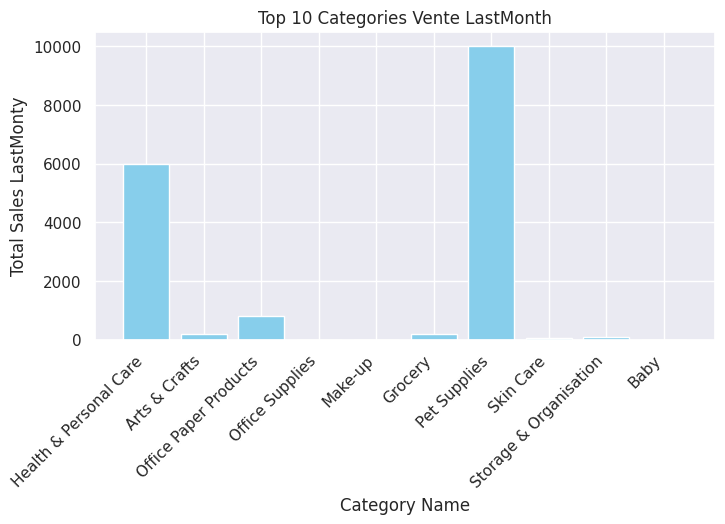

In [ ]:
top_10_products_bought_in_last_month = pd.DataFrame(sorted_top_rated_products)

# Tracer le diagramme à barres
plt.figure(figsize=(8,4))

plt.bar(top_10_products_bought_in_last_month['categoryName'], top_10_products_bought_in_last_month['boughtInLastMonth'], color='skyblue')

# Ajouter des étiquettes et un titre
plt.xlabel('Category Name')
plt.ylabel('Total Sales LastMonty')
plt.title('Top 10 Categories Vente LastMonth')

plt.xticks(rotation=45, ha='right')  # Faire pivoter les étiquettes pour une meilleure lisibilité

plt.show()

**Le nombre total de produits par catégories**

In [ ]:
category_counts = data_explo['categoryName'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
category_counts.head(10)

,Category,Count
0,Sports & Outdoors,826076
1,Skin Care,18755
2,Fragrances,18563
3,Make-up,18453
4,Manicure & Pedicure Products,17212
5,"Handmade Clothing, Shoes & Accessories",16707
6,Men,16384
7,Women,16284
8,Handmade Gifts,15790
9,Handmade Artwork,15297


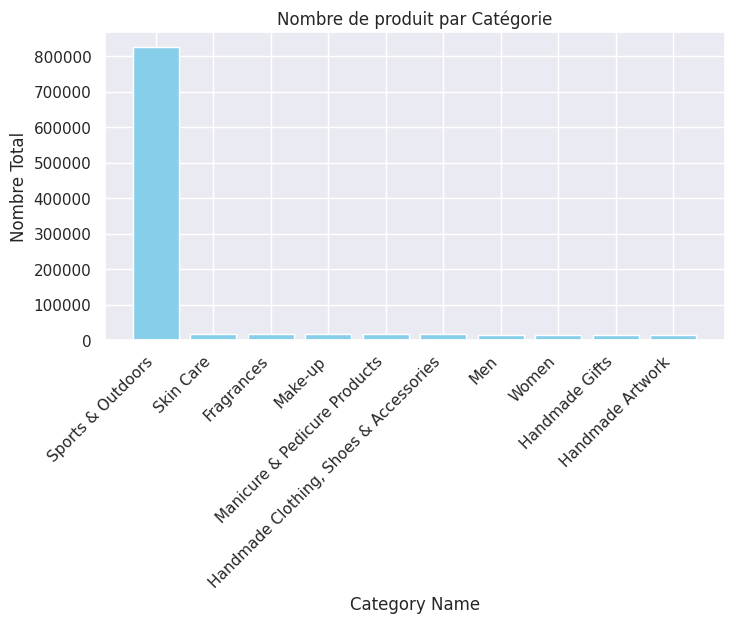

In [ ]:
category_counts = pd.DataFrame(category_counts)
category_counts.columns = ['Category', 'Count']

plt.figure(figsize=(8,4))

plt.bar(category_counts['Category'].head(10), category_counts['Count'].head(10), color='skyblue')

plt.xlabel('Category Name')
plt.ylabel('Nombre Total')
plt.title('Nombre de produit par Catégorie')

plt.xticks(rotation=45, ha='right')  # Faire pivoter les étiquettes pour une meilleure lisibilité

plt.show()


*On remarque que la catégorie **`Sports & Outdoors`** est celle qui dispose de plus de produits et ceci largement à toutes les autres.*

## **V. Data Analysis**

# Nouvelle section

**V. Models**

Les models à utiliser:


*   Logistic Regression
*   Random Forest
*   Multi Layer Perceptron
*   Support Vector Machine





Les Metriques:


*   Accurarcy
*   Matrice de Confusion



1. Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_KNN=data_KNN[cols]
Y_KNN=data_KNN[["isBestSeller"]]
X_train, X_test, y_train, y_test = train_test_split(X_KNN, Y_KNN, test_size=0.33, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Entrainer le modèle
model = LogisticRegression()
params = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [ ]:
best_model_knn = grid_search.best_estimator_

In [ ]:
best_model_knn.score(X_test,y_test)

0.9972351926708066

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=best_model_knn.predict(X_test)
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
cm

array([[731404,    117],
       [  1911,     73]])

<Axes: >

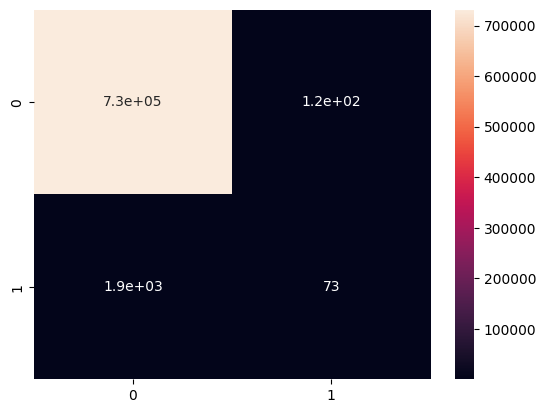

In [ ]:
import seaborn as sns

# Affichage graphique de la matrice de confusion
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import f1_score
lg_knn_f1=f1_score(y_test, y_pred, average='macro')
lg_knn_f1

0.5328864291913801

In [ ]:
from sklearn.metrics import recall_score
lg_knn_recall=recall_score(y_test, y_pred, average='macro')
lg_knn_recall

0.5183172070562347

In [ ]:
from sklearn.metrics import accuracy_score
lg_knn_acc=accuracy_score(y_test, y_pred)
lg_knn_acc

0.9972351926708066

*strategy 2 pour la regression logistique*

In [ ]:
X_q3=data_q3[cols]
Y_q3=data_q3[["isBestSeller"]]
X_train, X_test, y_train, y_test = train_test_split(X_q3, Y_q3, test_size=0.33, random_state=42)
model_q3 = LogisticRegression()
params = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(model_q3, params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [ ]:
best_model_lg_q3 = grid_search.best_estimator_

In [ ]:
y_pred=best_model_lg_q3.predict(X_test)
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
cm

array([[731404,    117],
       [  1911,     73]])

<Axes: >

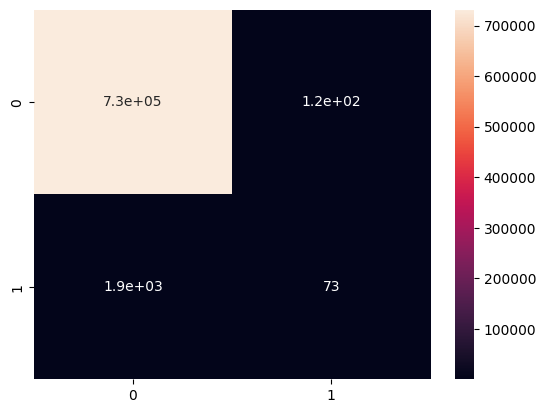

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
lg_q3_f1=f1_score(y_test, y_pred, average='macro')
lg_q3_f1

0.5328864291913801

In [ ]:
lg_q3_recall=recall_score(y_test, y_pred, average='macro')
lg_q3_recall

0.5183172070562347

In [ ]:
lg_q3_acc=accuracy_score(y_test, y_pred)
lg_q3_acc

0.9972351926708066

In [ ]:
X_mean=data_mean[cols]
Y_mean=data_mean[["isBestSeller"]]
X_train, X_test, y_train, y_test = train_test_split(X_mean, Y_mean, test_size=0.33, random_state=42)


*strategy 3 pour la regression logistique*

In [ ]:
import joblib
joblib.dump(best_model_knn, 'model_knn_lg.pkl')
joblib.dump(best_model_lg_q3, 'model_q3_lg.pkl')

['model_q3_lg.pkl']